<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# ENTORNO DE PROGRAMACION

En este notebook vemos como podemos instalar las librerias de qiskit en un entorno distinto de IBM Quantum.

In [1]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install pylatexenc
!pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 23.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.2 MB/s eta 0:

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.45.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ, Aer

IBMQ.save_account('807454d47ee36239856f1751489e9a6c0df8e433a4c335f8cd9d4d7fc697fce7f1d6fbeec86553b2cd8d3d61ae73114b9c704a520699b9ba5b0eb3afd2c1dab1') 

/tmp/ipykernel_7278/1454869766.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('807454d47ee36239856f1751489e9a6c0df8e433a4c335f8cd9d4d7fc697fce7f1d6fbeec86553b2cd8d3d61ae73114b9c704a520699b9ba5b0eb3afd2c1dab1')


In [4]:
#list available backends - entornos de ejecucion disponibles para tu cuenta
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
#imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

%matplotlib inline

In [6]:
#BUILD A CIRCUIT AND MEASUREMENT
qreg = QuantumRegister(3) # a 3-qubit register
creg = ClassicalRegister(3) # a 3-bit classical register
qc = QuantumCircuit(qreg,creg) # create a circuit

qreg_q=QuantumRegister(3,'q')
creg_c=ClassicalRegister(3,'c')
qc= QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.cx(qreg_q[0],qreg_q[1])
qc.cx(qreg_q[1],qreg_q[2])

qc.measure(qreg_q,creg_c)

result_counts ->  {'000': 272, '111': 240}


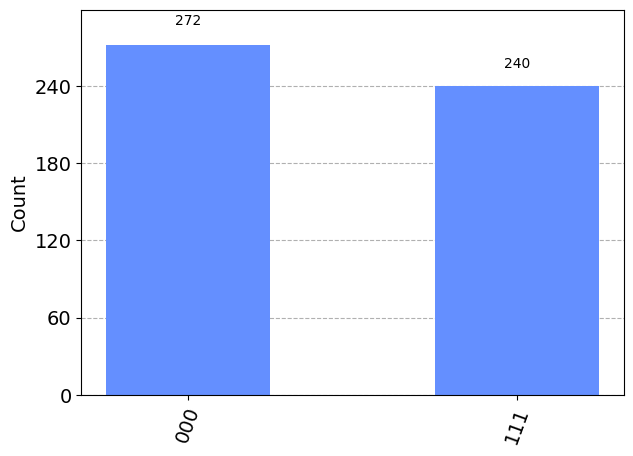

In [7]:
# COMPILIMG AND RUNNING -SIMMULATOR
backend=provider.get_backend('ibmq_qasm_simulator')
job=execute(qc,backend,shots=512) # shots default = 1024
result=job.result()
result_counts=result.get_counts()
print('result_counts -> ',result_counts)
plot_histogram(result_counts)# COMPILIMG AND RUNNING -SIMMULATOR

Al ejecutar en una QPU real tu trabajo se encola y puede tardar mucho en ejecutarse. 

Pdemos ir al Dashboard > Jobs de tu cuenta y ver el tiempo estimado de ejecucion en la cola

In [ ]:
# COMPILIMG AND RUNNING - IBMQ QPU
backend=provider.get_backend('ibm_brisbane')
job=execute(qc,backend,shots=512) # shots default = 1024
result=job.result()
result_counts=result.get_counts()
print('result_counts -> ',result_counts)
plot_histogram(result_counts)